In [1]:
import numpy as np
import pandas as pd

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/mlds_final_data/MLDS_final_data"))

['final_test_data.csv', '.ipynb_checkpoints', 'final_train_data.csv']


In [2]:
train=pd.read_csv('../input/mlds_final_data/MLDS_final_data/final_train_data.csv')
test1=pd.read_csv('../input/mlds_final_data/MLDS_final_data/final_test_data.csv')
train.head()

,Unnamed: 0,Country Name,Country Code,Year,Balance,Inflation,GDP,Exports,Trade
0,0,Senegal,SEN,1983,-3.043829e+08,9.274213,-5.326393,6.180000e+08,59.224298
1,1,Togo,TGO,2009,-1.766692e+08,1.855275,3.510297,9.030260e+08,76.242542
2,2,Pakistan,PAK,1992,-1.876092e+09,10.057085,7.705898,7.351000e+09,34.489440
3,3,Nepal,NPL,1988,-2.714506e+08,11.815310,7.696809,1.900000e+08,24.978422
4,5,Malta,MLT,2016,7.269132e+08,1.604548,5.516617,3.017299e+09,83.781471


In [3]:
test1.head()

,Unnamed: 0,Country Name,Country Code,Year,Inflation,GDP,Exports,Trade
0,0,Cyprus,CYP,2001,3.657166,3.600665,9.760000e+08,46.359979
1,1,Benin,BEN,1995,15.099452,6.045199,4.200000e+08,53.726740
2,2,Bangladesh,BGD,1995,7.144939,5.121278,3.501000e+09,26.871554
3,3,Paraguay,PRY,1978,9.706191,12.028730,2.569700e+08,27.230654
4,4,Morocco,MAR,1987,3.014808,-0.325004,2.826000e+09,32.418633


In [4]:
# train[train['Country Name']=='India']

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


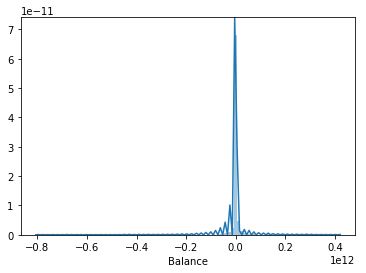

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.distplot(train['Balance'],bins=100)
# np.cbrt(train['Balance'])

In [6]:
# (1-train['Trade']/100)*train['Exports']
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,4506,NaN,NaN,NaN,2843.5,1636.69,0,1430.25,2834.5,4254.75,5703
Country Name,4506,150,Israel,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country Code,4506,150,ISR,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,4506,NaN,NaN,NaN,1996.32,12.1963,1960,1986,1997,2007,2016
Balance,4506,NaN,NaN,NaN,-5.13203e+08,3.56101e+10,-8.06e+11,-9.81187e+08,-1.60329e+08,2.88525e+07,4.21e+11
Inflation,4261,NaN,NaN,NaN,31.6135,353.818,-29.6911,2.4,6.18435,12.4097,13611.6
GDP,4262,NaN,NaN,NaN,3.64122,4.85098,-62.0759,1.48104,3.79997,6.05023,34.5
Exports,4490,NaN,NaN,NaN,4.33961e+10,1.44544e+11,2e+06,4.80426e+08,2.93014e+09,2.04478e+10,2.34e+12
Trade,4304,NaN,NaN,NaN,62.8893,46.754,7.92091,38.0963,52.4365,76.7458,957.784


In [7]:
test=test1.copy()
test.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1071,NaN,NaN,NaN,535,309.315,0,267.5,535,802.5,1070
Country Name,1071,150,Colombia,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country Code,1071,150,COL,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,1071,NaN,NaN,NaN,1996.84,12.14,1961,1987,1998,2007,2016
Inflation,1071,NaN,NaN,NaN,19.6689,135.853,-18.9297,2.39804,6.00125,12.3189,4107.3
GDP,1071,NaN,NaN,NaN,3.75876,4.73283,-29.589,1.60573,3.93194,6.16225,26.2686
Exports,1071,NaN,NaN,NaN,5.52162e+10,1.73422e+11,3.894e+06,5.37892e+08,2.74e+09,2.40625e+10,2.1e+12
Trade,1071,NaN,NaN,NaN,60.3632,39.4926,4.90944,37.2646,50.9408,72.9673,345.417


In [8]:
train['gdp_growth']=train['GDP']-train['Inflation']
train['exports_tradeoff']=(1-train['Trade']/100)*train['Exports']
# train['gdp_tradeoff']=train['GDP']/train['Trade']

test['gdp_growth']=test['GDP']-test['Inflation']
test['exports_tradeoff']=(1-test['Trade']/100)*test['Exports']
# test['gdp_tradeoff']=test['GDP']/test['Trade']

train['Year']=train['Year'].astype(np.object)
test['Year']=test['Year'].astype(np.object)

In [9]:
train.head()

,Unnamed: 0,Country Name,Country Code,Year,Balance,Inflation,GDP,Exports,Trade,gdp_growth,exports_tradeoff
0,0,Senegal,SEN,1983,-3.043829e+08,9.274213,-5.326393,6.180000e+08,59.224298,-14.600606,2.519938e+08
1,1,Togo,TGO,2009,-1.766692e+08,1.855275,3.510297,9.030260e+08,76.242542,1.655022,2.145360e+08
2,2,Pakistan,PAK,1992,-1.876092e+09,10.057085,7.705898,7.351000e+09,34.489440,-2.351187,4.815681e+09
3,3,Nepal,NPL,1988,-2.714506e+08,11.815310,7.696809,1.900000e+08,24.978422,-4.118501,1.425410e+08
4,5,Malta,MLT,2016,7.269132e+08,1.604548,5.516617,3.017299e+09,83.781471,3.912069,4.893615e+08


In [10]:
# train=train[(train['Inflation']<=4107.3) & (train['GDP']<=27) & (train['Trade']<=350) & (train['gdp_growth']<=31)]

In [11]:
train.shape
n_cols=['Inflation', 'GDP', 'Exports', 'Trade', 'gdp_growth','exports_tradeoff']

In [12]:
for i in n_cols:
    train[i].fillna(train[i].mean(),inplace=True)
    test[i].fillna(test[i].mean(),inplace=True)

In [13]:
train.head()

,Unnamed: 0,Country Name,Country Code,Year,Balance,Inflation,GDP,Exports,Trade,gdp_growth,exports_tradeoff
0,0,Senegal,SEN,1983,-3.043829e+08,9.274213,-5.326393,6.180000e+08,59.224298,-14.600606,2.519938e+08
1,1,Togo,TGO,2009,-1.766692e+08,1.855275,3.510297,9.030260e+08,76.242542,1.655022,2.145360e+08
2,2,Pakistan,PAK,1992,-1.876092e+09,10.057085,7.705898,7.351000e+09,34.489440,-2.351187,4.815681e+09
3,3,Nepal,NPL,1988,-2.714506e+08,11.815310,7.696809,1.900000e+08,24.978422,-4.118501,1.425410e+08
4,5,Malta,MLT,2016,7.269132e+08,1.604548,5.516617,3.017299e+09,83.781471,3.912069,4.893615e+08


In [14]:
from sklearn.preprocessing import RobustScaler,StandardScaler,Normalizer
r=RobustScaler()
train[n_cols]=r.fit_transform(train[n_cols])
test[n_cols]=r.transform(test[n_cols])

In [15]:
# from sklearn.preprocessing import RobustScaler,StandardScaler,Normalizer
# for i in ['Inflation', 'GDP', 'Exports', 'Trade', 'gdp_growth','exports_tradeoff']:
#     r=RobustScaler()
#     train[i]=r.fit_transform(train[i])
#     test[i]=r.transform(test[i])
train[n_cols].isnull().sum()

Inflation           0
GDP                 0
Exports             0
Trade               0
gdp_growth          0
exports_tradeoff    0
dtype: int64

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 10 columns):
Unnamed: 0          1071 non-null int64
Country Name        1071 non-null object
Country Code        1071 non-null object
Year                1071 non-null object
Inflation           1071 non-null float64
GDP                 1071 non-null float64
Exports             1071 non-null float64
Trade               1071 non-null float64
gdp_growth          1071 non-null float64
exports_tradeoff    1071 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 83.8+ KB


In [17]:
from catboost import CatBoostClassifier,Pool, cv,CatBoostRegressor
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from scipy.stats import mode

In [18]:
X_train,X_val,y_train,y_val = train_test_split(train.drop(['Unnamed: 0','Balance'],axis=1),train['Balance'],
                                                 test_size=0.25,random_state = 1994)

In [19]:
categorical_features_indices = np.where(X_train.dtypes =='object')[0]
categorical_features_indices

array([0, 1, 2])

In [20]:
X,y=train.drop(['Unnamed: 0','Balance'],axis=1),train['Balance']
Xtest=test.drop(['Unnamed: 0'],axis=1)
# X.head()

In [21]:
import math
def rmsle(h, y): 
    """
    Compute the Root Mean Squared Log Error for hypthesis h and targets y

    Args:
        h - numpy array containing predictions with shape (n_samples, n_targets)
        y - numpy array containing targets with shape (n_samples, n_targets)
    """
    return 1/(1+math.exp(np.sqrt(np.square(np.log(h + 1) - np.log(y + 1)).mean())))

def runCatBoost(x_train, y_train,x_test, y_test,test,depth):
    model=CatBoostRegressor(n_estimators=1000,
                            learning_rate=0.1,
                            loss_function='RMSE',
                            eval_metric='RMSE',
                            random_seed=1994,
#                             od_type='Iter',
#                             od_wait=50
                           )
                           
    model.fit(x_train, y_train,cat_features=categorical_features_indices, eval_set=(x_test, y_test), use_best_model=True, verbose=150)
    y_pred_train=model.predict(x_test)
    rmsle_result = rmsle(y_pred_train,y_test)
    y_pred_test=model.predict(test)
    return y_pred_train,rmsle_result,y_pred_test
#     return y_pred_train,y_pred_test

In [22]:
from sklearn import model_selection
pred_full_test_cat_feen = 0
mse_cat_list_feen=[]
kf = model_selection.KFold(n_splits=2, shuffle=True, random_state=30)
for dev_index, val_index in kf.split(X):
    dev_X, val_X = X.loc[dev_index], X.loc[val_index]
    dev_y, val_y = y.loc[dev_index], y.loc[val_index]
    y_pred_feen,rmsle_feen,y_pred_test_feen=runCatBoost(dev_X, dev_y, val_X, val_y,Xtest,depth=4)
    print('fold score :',rmsle_feen)
    mse_cat_list_feen.append(rmsle_feen)
    pred_full_test_cat_feen = pred_full_test_cat_feen + y_pred_test_feen
mse_cat_feen_mean=np.mean(mse_cat_list_feen)
print("Mean cv score : ", np.mean(mse_cat_feen_mean))
y_pred_test_feen=pred_full_test_cat_feen/2

Got unsafe target value = 3.81949e+08 at object #0 of dataset learn
Got unsafe target value = -1.76669e+08 at object #0 of dataset test #0


0:	learn: 26038031343.5091095	test: 41258915871.7544937	best: 41258915871.7544937 (0)	total: 77.8ms	remaining: 1m 17s
150:	learn: 8556435434.5866537	test: 21141272029.6266289	best: 21141272029.6266289 (150)	total: 1.16s	remaining: 6.51s
300:	learn: 7290536885.8879404	test: 20759479524.2510109	best: 20753398811.0493240 (276)	total: 2.45s	remaining: 5.7s
450:	learn: 6612348782.7117434	test: 20590213746.2395172	best: 20578286395.2597237 (446)	total: 3.83s	remaining: 4.66s
600:	learn: 6193763231.8758287	test: 20603917193.7322426	best: 20520878444.7064095 (519)	total: 5.04s	remaining: 3.34s
750:	learn: 5873624547.6873026	test: 20638811769.7872391	best: 20520878444.7064095 (519)	total: 6.31s	remaining: 2.09s
900:	learn: 5672483864.7958498	test: 20622062249.5920029	best: 20520878444.7064095 (519)	total: 7.46s	remaining: 820ms
999:	learn: 5581550427.7267017	test: 20668149417.2319679	best: 20520878444.7064095 (519)	total: 8.2s	remaining: 0us

bestTest = 2.052087844e+10
bestIteration = 519

Shri

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.
Got unsafe target value = -2.05257e+08 at object #0 of dataset learn
Got unsafe target value = -3.04383e+08 at object #0 of dataset test #0


150:	learn: 12218515181.5196018	test: 14156194710.6299553	best: 12478020408.3355389 (30)	total: 1.22s	remaining: 6.87s
300:	learn: 10208867314.0500584	test: 13751237900.1462231	best: 12478020408.3355389 (30)	total: 2.5s	remaining: 5.82s
450:	learn: 9359178576.7636662	test: 13772443303.7618465	best: 12478020408.3355389 (30)	total: 3.67s	remaining: 4.47s
600:	learn: 8547828141.6832094	test: 13846955438.6088257	best: 12478020408.3355389 (30)	total: 4.86s	remaining: 3.23s
750:	learn: 7802127488.3046284	test: 13770840553.5336990	best: 12478020408.3355389 (30)	total: 6.17s	remaining: 2.05s
900:	learn: 7102908432.8161144	test: 13767315066.8642235	best: 12478020408.3355389 (30)	total: 7.5s	remaining: 825ms
999:	learn: 6939685630.7889805	test: 13709545480.9336586	best: 12478020408.3355389 (30)	total: 8.4s	remaining: 0us

bestTest = 1.247802041e+10
bestIteration = 30

Shrink model to first 31 iterations.
fold score : 0.04894086079882395
Mean cv score :  0.0836193419092297


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


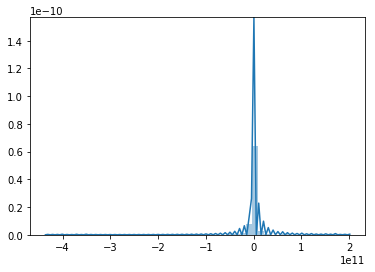

In [23]:
sns.distplot(y_pred_test_feen)

In [24]:
test1['Balance']=y_pred_test_feen
test1.drop('Unnamed: 0',axis=1,inplace=True)

In [25]:
# y_pred_test_feen
# s=pd.DataFrame({'Balance':y_pred_test_feen})
test1.to_excel('2foldcb8.xlsx',index=False)
test1.head()

,Country Name,Country Code,Year,Inflation,GDP,Exports,Trade,Balance
0,Cyprus,CYP,2001,3.657166,3.600665,9.760000e+08,46.359979,-2.401426e+09
1,Benin,BEN,1995,15.099452,6.045199,4.200000e+08,53.726740,3.132878e+08
2,Bangladesh,BGD,1995,7.144939,5.121278,3.501000e+09,26.871554,-1.175496e+09
3,Paraguay,PRY,1978,9.706191,12.028730,2.569700e+08,27.230654,-2.481381e+08
4,Morocco,MAR,1987,3.014808,-0.325004,2.826000e+09,32.418633,-2.184975e+09


In [26]:
# cat_model = CatBoostRegressor(n_estimators=1000, # use large n_estimators deliberately to make use of the early stopping
# #                          reg_lambda=1.0,
# #                          l2_leaf_reg=4.0,
#                          eval_metric='RMSE',
#                          random_seed=1994,
# #                          learning_rate = 0.05,
# #                          depth = 8,
                               
# #                                boosting_type = 'Ordered',
# #                          subsample = 0.8
#                          #rsm = 0.7,
#                          #silent=True,
#                          #max_ctr_complexity = 5,  # no of categorical cols combined
# #                          boosting_type = 'Ordered',
# #                          od_type = 'IncToDec',  #overfitting params
# #                          od_wait = 20)
#                          #bagging_temperature = 1.0)
#                               )
# # lr=0.05, no od type of vars -- highest
    
# cat_model.fit(X_train.values,y_train.values,cat_features=categorical_features_indices,eval_set=(X_val, y_val),
#         plot=False,early_stopping_rounds=100,use_best_model=True) 

In [27]:
# sorted(zip(cat_model.feature_importances_,X_train),reverse=True)

In [28]:

# X,y=train1.drop(['Unnamed: 0','Balance'],axis=1),train1['Balance']
# Xtest=test.drop(['Unnamed: 0'],axis=1)

In [29]:
# cat_model.fit(X,y,cat_features=categorical_features_indices,eval_set=(X, y),
#         plot=False,early_stopping_rounds=100,use_best_model=True)
# y_pred=cat_model.predict(Xtest)

In [30]:
# test.shape

In [31]:
# s=test['Unnamed: 0']
# s['Balance']=y_pred
# test
# np.power(y_pred,3)

In [32]:
# s=pd.DataFrame({'Balance':y_pred})
# s.head()
# # s.to_csv('catboost1.csv',index=False) --main 62 max depth-8 lr-0.1
# # s.to_excel('catboost8_4folds.xlsx',index=False) #--nope

In [33]:
# s.to_excel('s7.xlsx',index=False)

In [34]:
# sns.distplot(np.power(y_pred,3))

In [35]:
# sns.distplot(train1['Balance'])